# Performing sentiment analysis

## Data Set

`Covid tweets`

The data set is as a result of a scrapping exercise by `GABRIEL PREDA` and was last updated in `2020`

[Download source](https://www.kaggle.com/datasets/gpreda/covid19-tweets)

[DOI](10.34740/kaggle/dsv/1451513)

### Data Content

Tweets with #covid19 hashtag. Collection started on 25/7/2020, with an initial 17k batch and will continue on a daily basis.

The data is in the form of `csv`



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# data set

# data path
path = "drive/My Drive/covid19_tweets.csv"

# reading the data
covidData = pd.read_csv(path)
covidData.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


# Analysis

Using python natural language toolkit `NLTK`

## Initial analysis

### Vader Model

Uses `a bag of words approach`

This is a representation of text illustrating the occurrence of words within a document

It usually contains two parts

1. Vocabulary - Known words
2. Measure - presence of known words

Refereed to as a bag of words because `structure and order of words is discarded`

The analysis uses a `histogram` of the occurrence of each known word in a sentence


# Exploritory Data Analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# using ggplot style plots
plt.style.use('ggplot')

# natural language toolkit
import nltk

In [4]:
# type of data being used
covidData['text'].values[0]

'If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0'

In [28]:
covidData.shape

(179108, 13)

## Description

there are a total of `179108` tweets with `13 columns`

The key columns are the `text` and the `users_name` columns

The text column reprersents the tweets posted.The following is an example

```
If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0
```

In [5]:
covidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


<Axes: title={'center': 'Piechart of Verified Users'}, ylabel='Verified Users'>

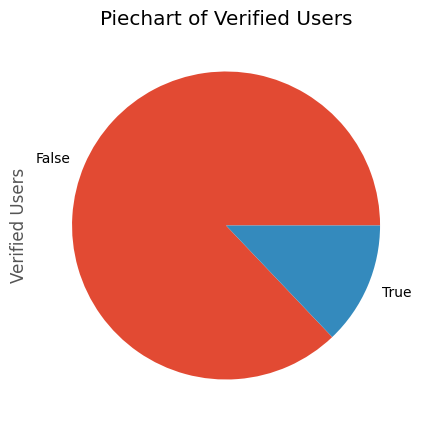

In [6]:
# posts by verified users

covidData['user_verified'].value_counts().plot( kind = 'pie',title = 'Piechart of Verified Users',
                                               figsize = (10, 5), ylabel= 'Verified Users')

In [7]:
# types of devices used by the users
device_type = covidData['source'].value_counts()

device_type

Twitter Web App              56891
Twitter for Android          40179
Twitter for iPhone           35472
TweetDeck                     8543
Hootsuite Inc.                7321
                             ...  
DataBlogger                      1
Dear_Assistant                   1
OnlyPultCom                      1
Washington Square Parkerz        1
Radiology: AI app                1
Name: source, Length: 610, dtype: int64

In [8]:
device_type['other'] = device_type.drop(['Twitter Web App',
                                        'Twitter for iPhone',
                                        'Twitter for Android']).sum()
device_type = device_type[['Twitter Web App',
                           'Twitter for iPhone',
                           'Twitter for Android',
                           'other']].fillna(0).astype(int)

device_type

Twitter Web App        56891
Twitter for iPhone     35472
Twitter for Android    40179
other                  46489
Name: source, dtype: int64

In [9]:
device_type.columns = ['Type', 'Count']
device_type

Twitter Web App        56891
Twitter for iPhone     35472
Twitter for Android    40179
other                  46489
Name: source, dtype: int64

<Axes: title={'center': 'Pie Chart of Devices Used'}, ylabel='Posts From'>

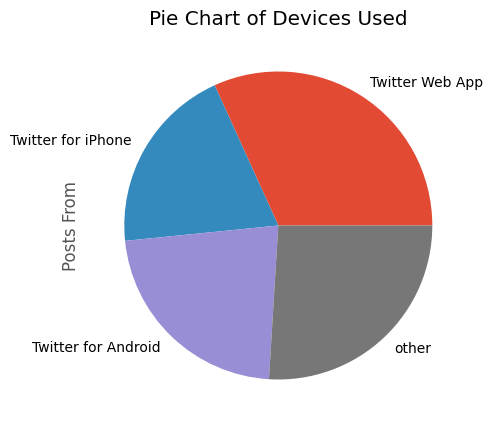

In [10]:
device_type.plot(kind ='pie',
                 title = 'Pie Chart of Devices Used',
                 figsize = (10,5),
                 ylabel = 'Posts From')

# Basic NLTK

In [11]:
# example
example = covidData['text'][50]
print(example)

Coronavirus Testing Fiasco: St Mirren have pledged to undertake an "urgent review" of their Covid-19 testing proced… https://t.co/Ifse0whbVE


In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
# using the nltk to split the sentence into individual words
tokens = nltk.word_tokenize(example)
tokens[:20]

['Coronavirus',
 'Testing',
 'Fiasco',
 ':',
 'St',
 'Mirren',
 'have',
 'pledged',
 'to',
 'undertake',
 'an',
 '``',
 'urgent',
 'review',
 "''",
 'of',
 'their',
 'Covid-19',
 'testing',
 'proced…']

In [14]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [15]:
# finding the part of speech for each token
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Coronavirus', 'NNP'),
 ('Testing', 'NNP'),
 ('Fiasco', 'NNP'),
 (':', ':'),
 ('St', 'NNP'),
 ('Mirren', 'NNP'),
 ('have', 'VBP'),
 ('pledged', 'VBN'),
 ('to', 'TO'),
 ('undertake', 'VB')]

# Pos Tagging codes

[Pos tagging tutorial](https://www.freecodecamp.org/news/an-introduction-to-part-of-speech-tagging-and-the-hidden-markov-model-953d45338f24/#:~:text=In%20corpus%20linguistics%2C%20part-of-speech%20tagging%20%28POS%20tagging%20or,related%20words%20in%20a%20phrase%2C%20sentence%2C%20or%20paragraph.)

## Tags and Abbreviations
|Abbreviation|Meaning|
|:--|--:|
|CC|coordinating conjunction|
|CD|cardinal digit|
|DT|determiner|
|EX|existential there|
|FW	foreign word
|IN|preposition/subordinating conjunction|
|JJ|This NLTK POS Tag is an adjective (large)|
|JJR|adjective, comparative (larger)|
|JJS|adjective, superlative (largest)|
|LS|list market|
|MD|modal (could, will)|
|NN|noun, singular (cat, tree)|
|NNS|noun plural (desks)|
|NNP|proper noun, singular (sarah)|
|NNPS|proper noun, plural (indians or americans)|
|PDT|predeterminer (all, both, half)|
|POS|possessive ending (parent\ ‘s)|
|PRP|personal pronoun (hers, herself, him, himself)|
|PRP$|possessive pronoun (her, his, mine, my, our )|
|RB|adverb (occasionally, swiftly)|
|RBR|adverb, comparative (greater)|
|RBS|adverb, superlative (biggest)|
|RP|particle (about)|
|TO|infinite marker (to)|
|UH|interjection (goodbye)|
|VB|verb (ask)|
|VBG|verb gerund (judging)|
|VBD|verb past tense (pleaded)|
|VBN|verb past participle (reunified)|
|VBP|verb, present tense not 3rd person singular(wrap)|
|VBZ|verb, present tense with 3rd person singular (bases)|
|WDT|wh-determiner (that, what)|
|WP|wh- pronoun (who)|
|WRB|wh- adverb (how)|

In [16]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [17]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [18]:
pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.4 MB/s eta 0:00:00


In [19]:
# group the data into chunks based on the tags

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Coronavirus/NNP)
  Testing/NNP
  Fiasco/NNP
  :/:
  St/NNP
  Mirren/NNP
  have/VBP
  pledged/VBN
  to/TO
  undertake/VB
  an/DT
  ``/``
  urgent/JJ
  review/NN
  ''/''
  of/IN
  their/PRP$
  Covid-19/JJ
  testing/NN
  proced…/NN
  https/NN
  :/:
  //t.co/Ifse0whbVE/NN)


# VADER Sentiment Scoring

Using NLTK `SentimentIntensityAnalyze` to get the `negative/neutral/positive` scores of the text

* using bag of words approach
1. stop words are removed `and, the, ...`
2. each word is scored and combined with the total score

VADER - `Valence Aware Dictionary and sEntiment Reasoner`

## Disadvantage
1. Does not account for the `relationship between words`

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # progress bar tracker

sia = SentimentIntensityAnalyzer()

In [23]:
# example implementation
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

### Polarity_scores()
creates a vector from `0` to `1`

groups the scores into
1. positive
2. neutral
3. Negative

In [25]:
sia.polarity_scores('Monday is the worst day ever!')

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [27]:
# on the initial text example
sia.polarity_scores(example)

{'neg': 0.156, 'neu': 0.758, 'pos': 0.085, 'compound': -0.3612}

## Interpretation
the example statement is mostly negative as the compound score value is `-0.3612`

In [38]:
# running polarity score on the whole data set

# creating a smaller data frame for analysis

df = covidData.head(1000)
df = df.reset_index().rename(columns= {'index': 'id'})

df.shape

(1000, 14)

In [46]:
# holds the polarity score of the post by each userand the user name
results = {}

# perform the polarity scoring and show progres in a progress bar below
for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row['text']
  index = row['id']
  results[index] = sia.polarity_scores(text)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [47]:
results

{0: {'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.4939},
 1: {'neg': 0.059, 'neu': 0.844, 'pos': 0.097, 'compound': 0.2263},
 2: {'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compound': -0.2732},
 3: {'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.7351},
 4: {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3182},
 5: {'neg': 0.152, 'neu': 0.848, 'pos': 0.0, 'compound': -0.4976},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.6597},
 9: {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.4278},
 10: {'neg': 0.244, 'neu': 0.756, 'pos': 0.0, 'compound': -0.4939},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.087, 'neu': 0.595, 'pos': 0.317, 'compound': 0.7003},
 13: {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.3818},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, 'neu': 1.0

In [48]:
# convert the result dictionary into a panda dataframe
vaders_df = pd.DataFrame(results).T
vaders_df

,neg,neu,pos,compound
0,0.000,0.862,0.138,0.4939
1,0.059,0.844,0.097,0.2263
2,0.110,0.890,0.000,-0.2732
3,0.000,0.754,0.246,0.7351
4,0.000,0.839,0.161,0.3182
...,...,...,...,...
995,0.268,0.732,0.000,-0.6705
996,0.000,0.784,0.216,0.5106
997,0.000,1.000,0.000,0.0000
998,0.000,0.811,0.189,0.4215


In [49]:
# transpose the dictionary
vaders_df = vaders_df.reset_index().rename(columns= {'index': 'id'})
vaders_df = pd.concat([vaders_df, df], axis = 1) # add the original dataframe to the left

In [50]:
vaders_df

,id,neg,neu,pos,compound,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,0,0.000,0.862,0.138,0.4939,0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,1,0.059,0.844,0.097,0.2263,1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,2,0.110,0.890,0.000,-0.2732,2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,3,0.000,0.754,0.246,0.7351,3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,4,0.000,0.839,0.161,0.3182,4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.268,0.732,0.000,-0.6705,995,elKa,United States,"Equine compelled. Fascinated by flora, fauna, ...",2009-09-02 12:23:40,1237,1678,28297,False,2020-07-25 11:58:54,@CassieCeleste @lobster_nanny I do understand....,NaN,Twitter for iPhone,False
996,996,0.000,0.784,0.216,0.5106,996,Bitchrollss,NaN,"You know what they say , I always win 🥱",2020-07-25 11:34:27,0,50,0,False,2020-07-25 11:58:49,My job isn’t to enlighten you #fuck #alreadyvi...,"['fuck', 'alreadyvideo', 'bitch', 'die', 'love...",Twitter for iPhone,False
997,997,0.000,1.000,0.000,0.0000,997,Saito Section9,NaN,NaN,2014-05-22 09:49:32,472,482,138387,False,2020-07-25 11:58:47,"#COVID19 reflection in a street art, #Kharkiv,...","['COVID19', 'Kharkiv']",Twitter for iPhone,False
998,998,0.000,0.811,0.189,0.4215,998,ALASIRI MOTORS 🇰🇪,"Mombasa, Kenya",Car Dealership. \n Email :alasirimoto...,2020-02-15 22:15:48,1681,2889,1897,False,2020-07-25 11:58:47,Nice Read.\n@MoriangoJr @AdanZamuh @kunga_ @mo...,NaN,Twitter for Android,False


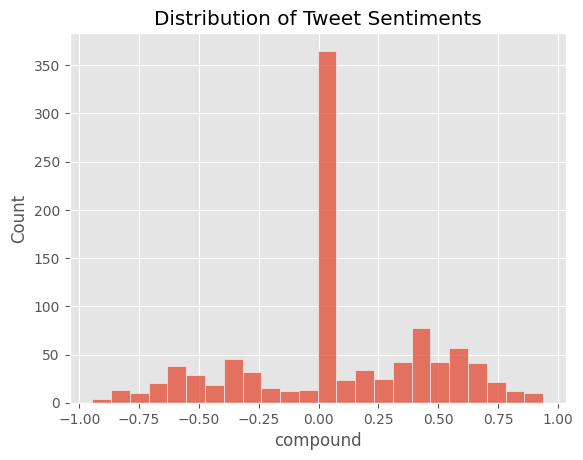

In [52]:
vader_plot = sns.histplot(data= vaders_df, x = 'compound')
vader_plot.set_title("Distribution of Tweet Sentiments")
plt.show()

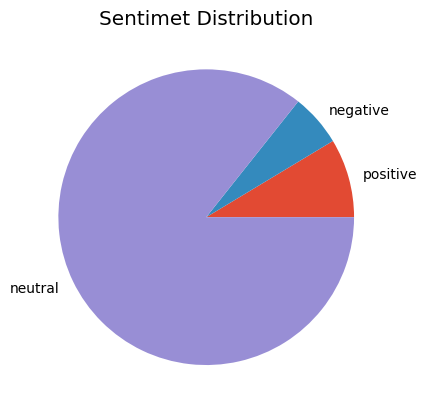

In [83]:
# tweet distribution as percentages
vaders_pos = vaders_df['pos'].mean()
vaders_neg = vaders_df['neg'].mean()
vaders_neu = vaders_df['neu'].mean()

vader_distrib = {'sentiment': ['positive', 'negative', 'neutral'],
                 'value' : [vaders_pos,vaders_neg, vaders_neu]}
vaders_perc_distrib = pd.DataFrame(vader_distrib)
plt.pie(vaders_perc_distrib['value'],
        labels = vaders_perc_distrib['sentiment'])
plt.title("Sentimet Distribution")
plt.show()

In [84]:
vaders_perc_distrib


,sentiment,value
0,positive,0.086212
1,negative,0.056887
2,neutral,0.856883


# Analysis

## Pretrained Model Comparison

### Roberta Model

sourced from `hugging face` 🤗

### Huggingface Pipeline



# Reasons

Human language is bases sentence meaning with context

Deep learnint is needed to understand sentiments based on the sentence context

In [85]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.1 MB/s eta 0:00:00


In [86]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax # the output needs smoothing between 0 and 1


In [87]:
# using the pretrained base sentiment model
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# pulls model weights that have beeen trained

# does transefer learning

# no need to pretrain the model


In [88]:
# vader results
print(example)
sia.polarity_scores(example)

Coronavirus Testing Fiasco: St Mirren have pledged to undertake an "urgent review" of their Covid-19 testing proced… https://t.co/Ifse0whbVE


{'neg': 0.156, 'neu': 0.758, 'pos': 0.085, 'compound': -0.3612}

In [90]:
# roberta results

# encoding text
# 1, 0 values that the model understands
encoded_text = tokenizer(example, return_tensors = 'pt')
encoded_text

{'input_ids': tensor([[    0, 15228,   261,  1469, 19473, 25980,   274, 47337,    35,   312,
          6512,  2558, 50141, 11990,  7114,     7, 15802,    41,    22,  7150,
          1342,  1551,   113,     9,    49, 19150,   808,    12,  1646,  3044,
         31902,  1174,  1205,   640,    90,     4,   876,    73,  1106,  1090,
           288, 11613,   428,  8856,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [92]:
# roberta results
rob_eg_out = model(**encoded_text)

# convert from tensor to np
rob_eg_out

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.5306,  1.1004, -1.8460]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [93]:
rob_scores = rob_eg_out[0][0].detach().numpy()
rob_scores = softmax(rob_scores)
rob_scores

array([0.34956   , 0.6179773 , 0.03246271], dtype=float32)

In [94]:
rob_scores_dict = {'roberta_neg': rob_scores[0],
                   'roberta_neu': rob_scores[1],
                   'roberta_pos': rob_scores[2]}
rob_scores_dict

{'roberta_neg': 0.34956, 'roberta_neu': 0.6179773, 'roberta_pos': 0.03246271}

**Notice** the new rating is `neutral` from the initial NLTK `positive`

# Running the Roberta Model on the whole Dataset

In [95]:
def polarity_roberta(examples):
  encoded_text = tokenizer(example, return_tensors = 'pt')
  rob_eg_out = model(**encoded_text)
  rob_scores = rob_eg_out[0][0].detach().numpy()
  rob_scores = softmax(rob_scores)
  rob_scores_dict = {'roberta_neg': rob_scores[0],
                   'roberta_neu': rob_scores[1],
                   'roberta_pos': rob_scores[2]}
  return rob_scores_dict

In [105]:
res = {}

# perform the polarity scoring and show progres in a progress bar below
for i, row in tqdm(df.iterrows(), total = len(df)):
  try: # adding this in case text is too large
    text = row['text']
    index = row['id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
  # rename vader result keys into vader_neu, vader_pos, vader_neg
    for key, value in vader_result.items():
      vader_result_rename[f'vader_{key}']  = value
    roberta_result = polarity_roberta(text)
    both = vader_result_rename | roberta_result
    res[index] = both
  except RuntimeError:
    print(f'Did not run for {index}')


  0%|          | 0/1000 [00:00<?, ?it/s]

# Transforms on the new results

In [110]:
rob_n_vaders_df = pd.DataFrame(res).T
rob_n_vaders_df

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,0.000,0.862,0.138,0.4939,0.34956,0.617977,0.032463
1,0.059,0.844,0.097,0.2263,0.34956,0.617977,0.032463
2,0.110,0.890,0.000,-0.2732,0.34956,0.617977,0.032463
3,0.000,0.754,0.246,0.7351,0.34956,0.617977,0.032463
4,0.000,0.839,0.161,0.3182,0.34956,0.617977,0.032463
...,...,...,...,...,...,...,...
995,0.268,0.732,0.000,-0.6705,0.34956,0.617977,0.032463
996,0.000,0.784,0.216,0.5106,0.34956,0.617977,0.032463
997,0.000,1.000,0.000,0.0000,0.34956,0.617977,0.032463
998,0.000,0.811,0.189,0.4215,0.34956,0.617977,0.032463


In [111]:
# transpose the dictionary
rob_n_vaders_df = rob_n_vaders_df.reset_index().rename(columns= {'index': 'id'})
rob_n_vaders_df = pd.concat([rob_n_vaders_df, df], axis = 1)

In [112]:
rob_n_vaders_df.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,id,user_name,...,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,0,0.000,0.862,0.138,0.4939,0.34956,0.617977,0.032463,0,ᏉᎥ☻լꂅϮ,...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,1,0.059,0.844,0.097,0.2263,0.34956,0.617977,0.032463,1,Tom Basile 🇺🇸,...,2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,2,0.110,0.890,0.000,-0.2732,0.34956,0.617977,0.032463,2,Time4fisticuffs,...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,3,0.000,0.754,0.246,0.7351,0.34956,0.617977,0.032463,3,ethel mertz,...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,4,0.000,0.839,0.161,0.3182,0.34956,0.617977,0.032463,4,DIPR-J&K,...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


# comparing results

In [114]:
rob_n_vaders_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'id', 'user_name',
       'user_location', 'user_description', 'user_created', 'user_followers',
       'user_friends', 'user_favourites', 'user_verified', 'date', 'text',
       'hashtags', 'source', 'is_retweet'],
      dtype='object')

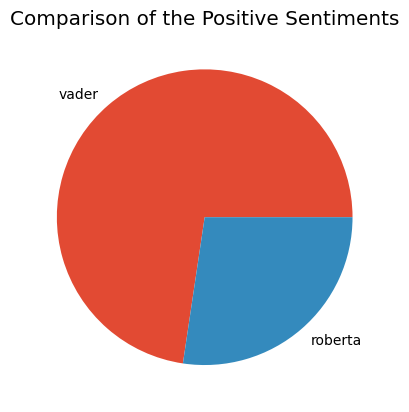

In [122]:
vaders_pos = rob_n_vaders_df['vader_pos'].mean()
roberta_pos = rob_n_vaders_df['roberta_pos'].mean()


rob_vader_distrib = {'sentiment': ['vader', 'roberta'],
                 'value' : [vaders_pos,roberta_pos]}
rob_vaders_perc_distrib = pd.DataFrame(rob_vader_distrib)
plt.pie(rob_vaders_perc_distrib['value'],
        labels = rob_vaders_perc_distrib['sentiment'])
plt.title("Comparison of the Positive Sentiments")
plt.show()

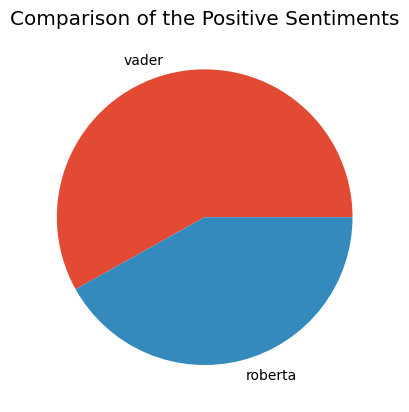

In [123]:
vaders_neu = rob_n_vaders_df['vader_neu'].mean()
roberta_neu = rob_n_vaders_df['roberta_neu'].mean()


rob_vader_distrib = {'sentiment': ['vader', 'roberta'],
                 'value' : [vaders_neu,roberta_neu]}
rob_vaders_perc_distrib = pd.DataFrame(rob_vader_distrib)
plt.pie(rob_vaders_perc_distrib['value'],
        labels = rob_vaders_perc_distrib['sentiment'])
plt.title("Comparison of the Positive Sentiments")
plt.show()